# Energy Utilization Trends

In [ ]:
!pip install pytrends

<Figure size 1200x800 with 0 Axes>

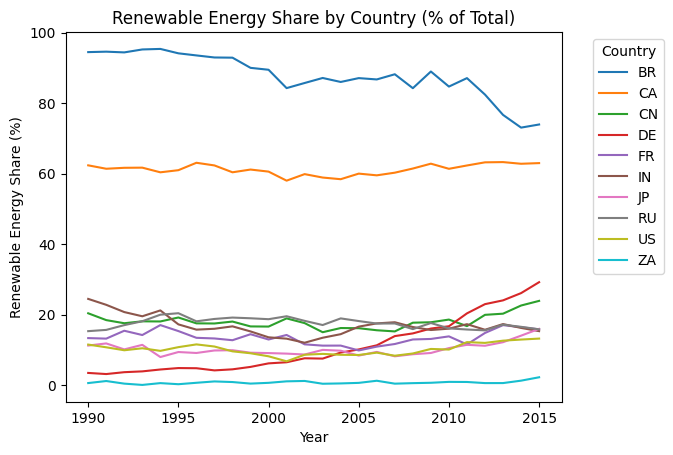

<Figure size 1200x800 with 0 Axes>

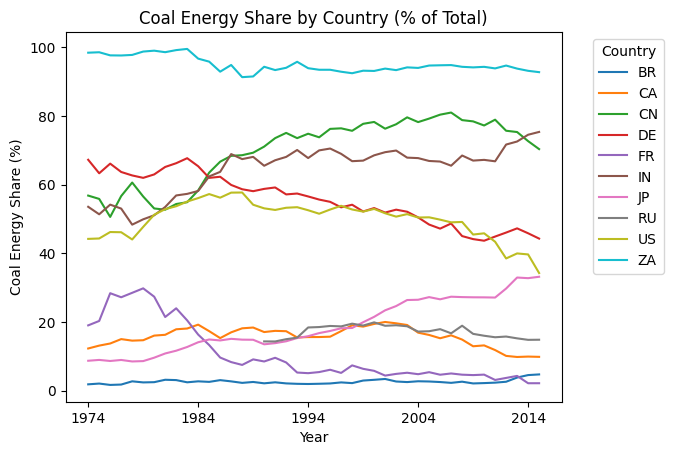

<Figure size 1200x800 with 0 Axes>

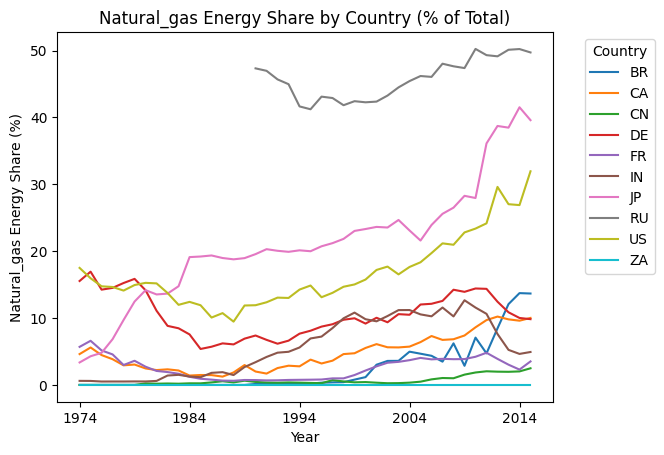

<Figure size 1200x800 with 0 Axes>

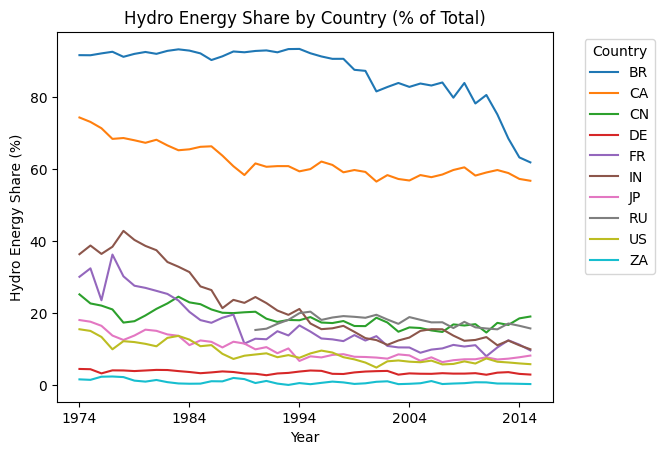

<Figure size 1200x800 with 0 Axes>

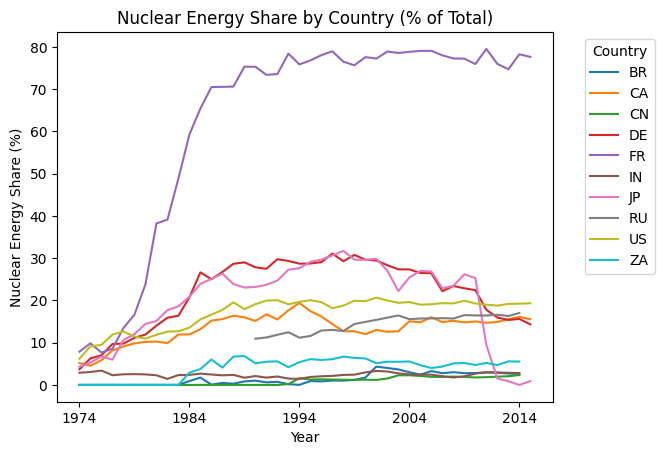

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# World Bank API URL for renewable energy share as % of total electricity output
renewable_url = 'http://api.worldbank.org/v2/country/{}/indicator/EG.ELC.RNEW.ZS?format=json'
# Additional World Bank indicators for various energy sources as a % of total (e.g., hydro, nuclear, etc.)
indicators = {
    'renewable': 'EG.ELC.RNEW.ZS',  # Renewable electricity output (% of total)
    'coal': 'EG.ELC.COAL.ZS',       # Coal electricity output (% of total)
    'natural_gas': 'EG.ELC.NGAS.ZS', # Natural gas electricity output (% of total)
    'hydro': 'EG.ELC.HYRO.ZS',       # Hydro electricity output (% of total)
    'nuclear': 'EG.ELC.NUCL.ZS'      # Nuclear electricity output (% of total)
}

# List of countries to fetch data for (ISO-2 country codes)
countries = ['CN', 'IN', 'BR', 'RU', 'ZA', 'DE', 'FR', 'CA', 'JP', 'US']  # You can add more countries

# Fetch data for a specific indicator and country list
def fetch_world_bank_data(countries, indicator):
    country_data = []
    for country in countries:
        url = f'http://api.worldbank.org/v2/country/{country}/indicator/{indicator}?format=json'
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            if data[1]:  # Check if data exists
                for entry in data[1]:
                    if entry['value'] is not None:  # Filter out missing values
                        country_data.append({
                            'Country': country,
                            'Year': entry['date'],
                            'Value': entry['value']
                        })
    return pd.DataFrame(country_data)

# Fetch and plot renewable energy data by country
def plot_energy_data(countries, indicators):
    for source, indicator in indicators.items():
        data = fetch_world_bank_data(countries, indicator)
        if not data.empty:
            data = data.pivot(index='Year', columns='Country', values='Value')
            plt.figure(figsize=(12, 8))
            data.plot()
            plt.title(f'{source.capitalize()} Energy Share by Country (% of Total)')
            plt.xlabel('Year')
            plt.ylabel(f'{source.capitalize()} Energy Share (%)')
            plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
            plt.show()
        else:
            print(f"No data available for {source} energy share.")

# Run the visualization function
plot_energy_data(countries, indicators)


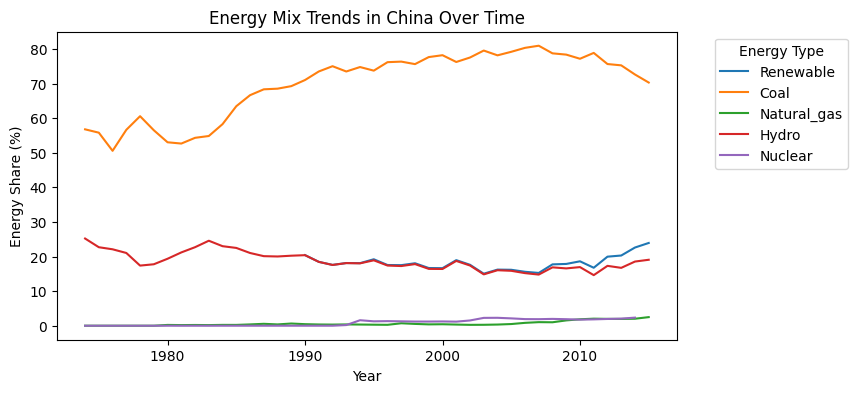

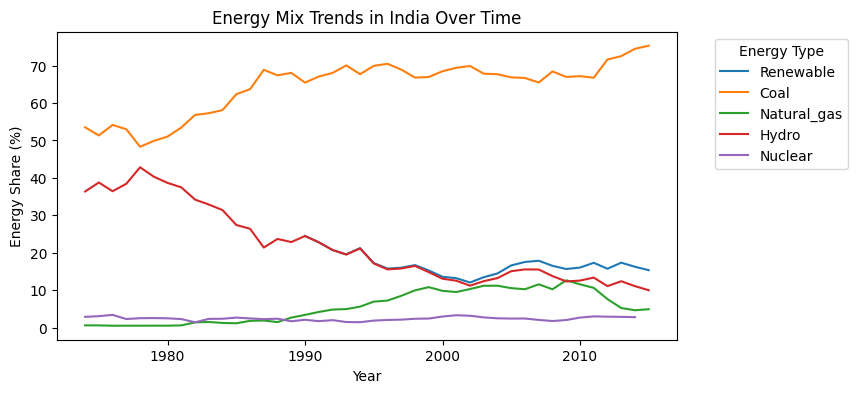

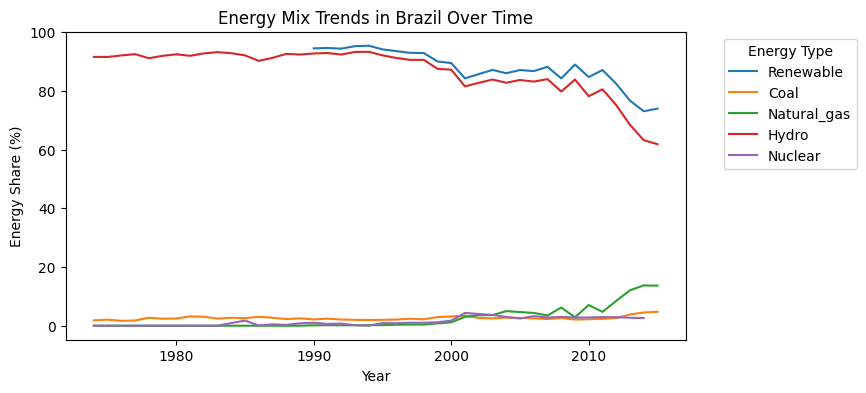

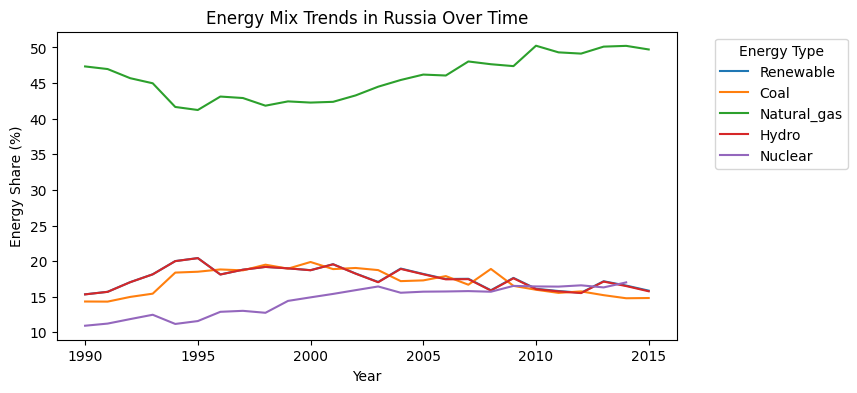

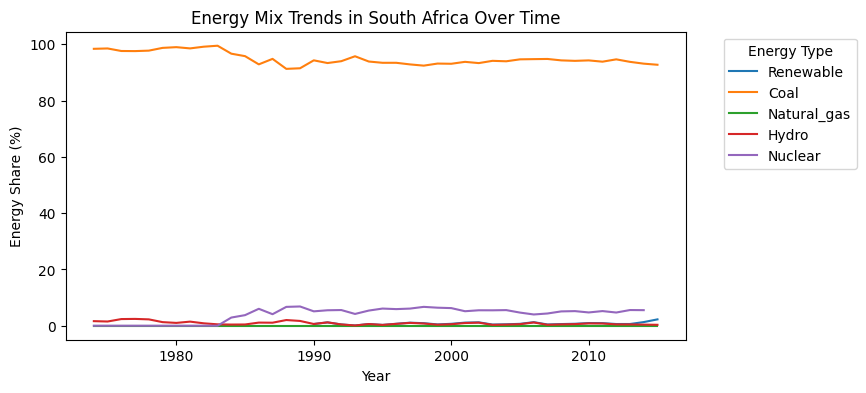

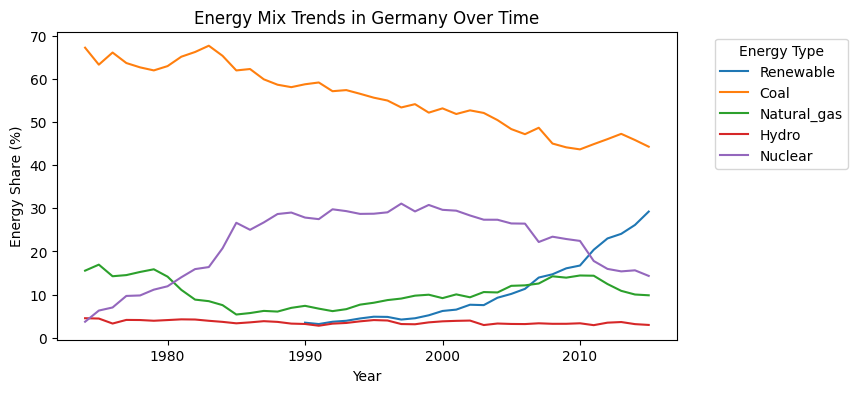

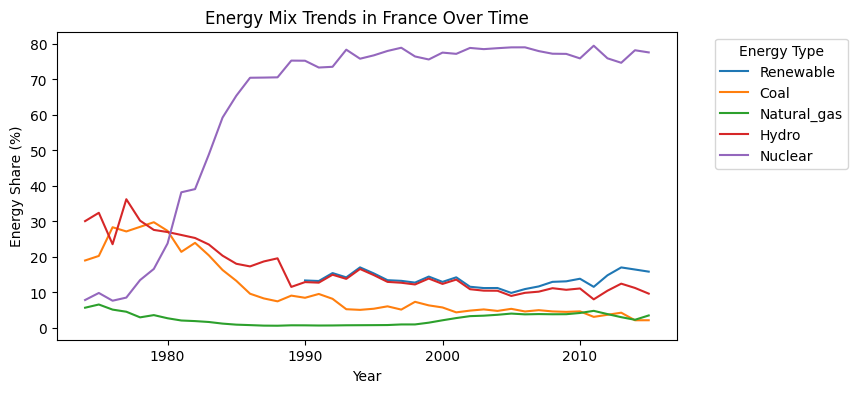

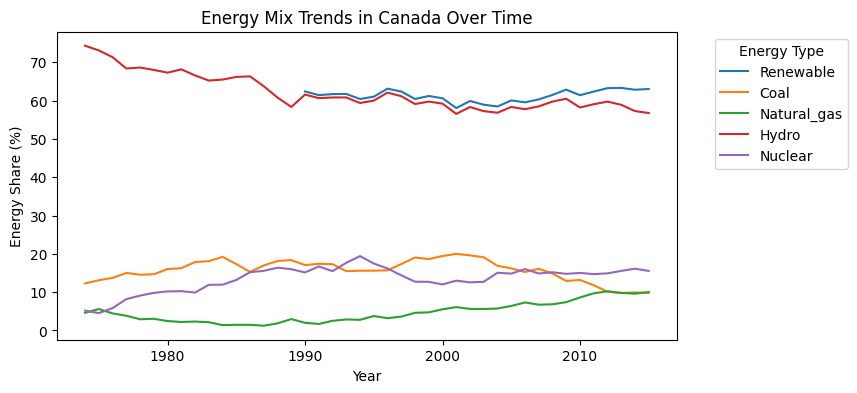

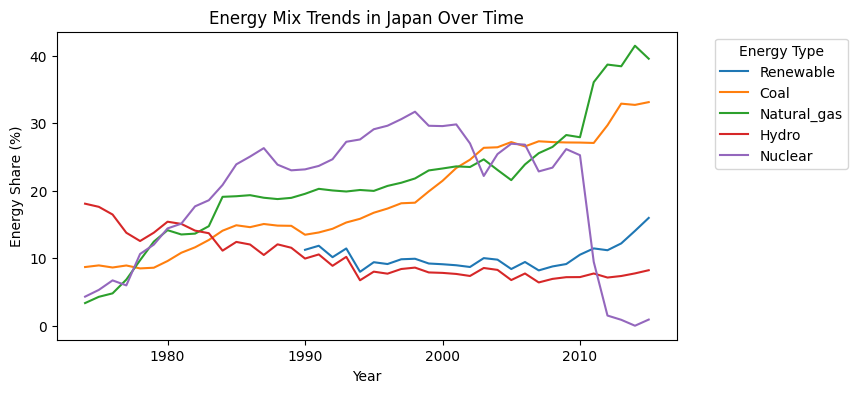

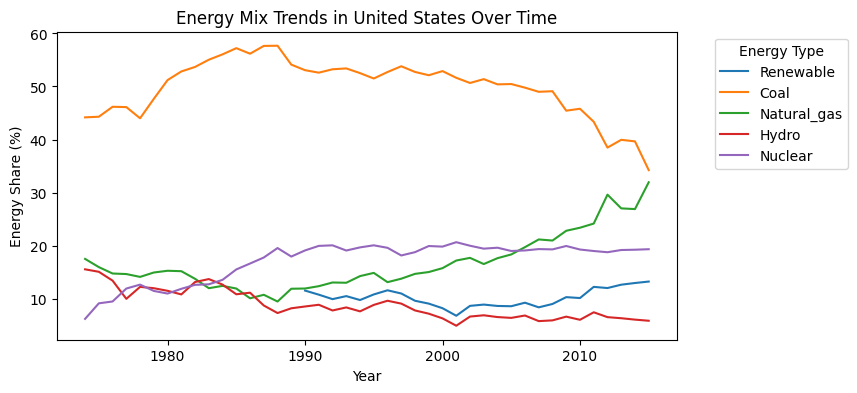

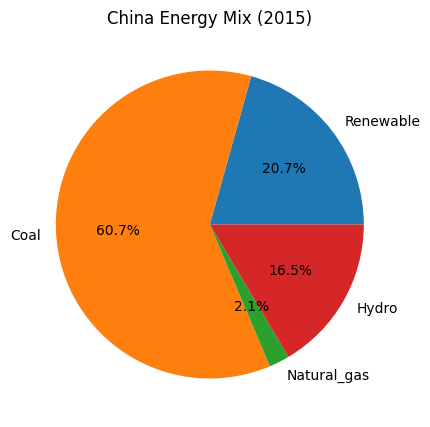

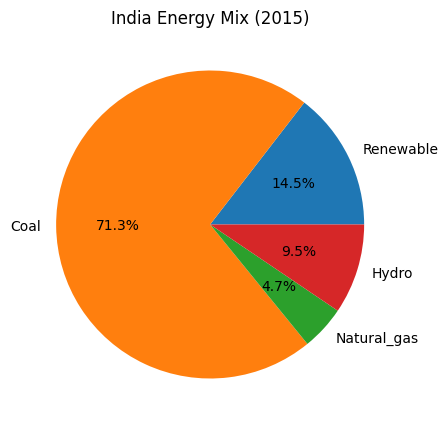

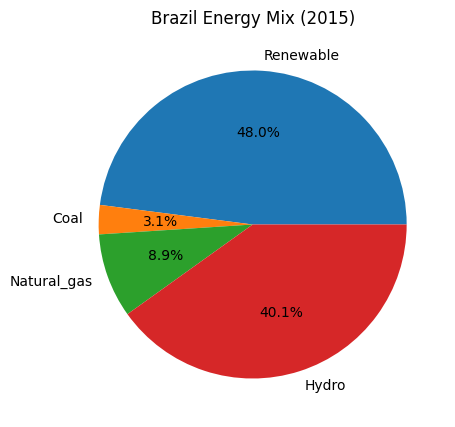

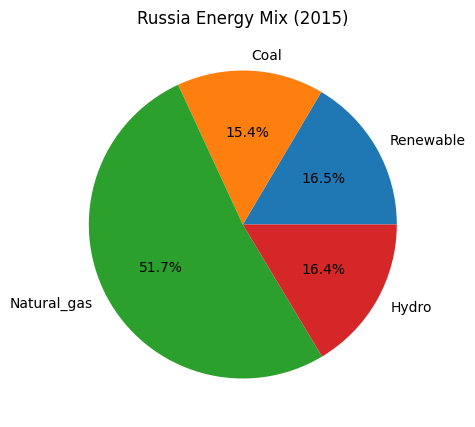

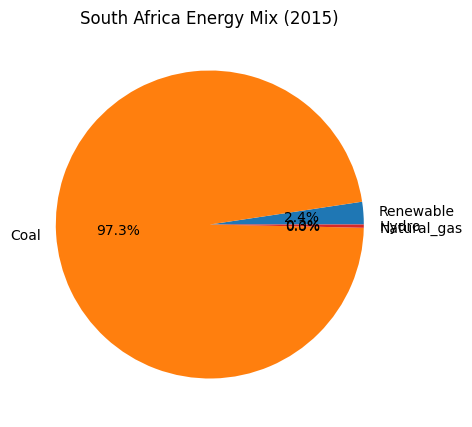

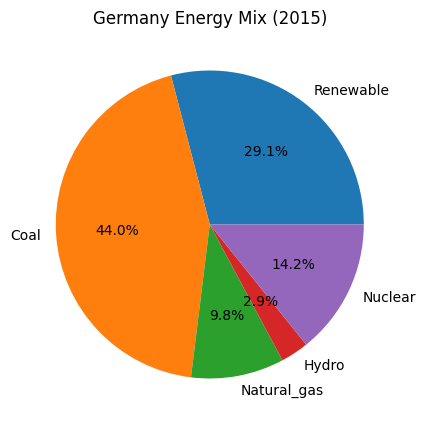

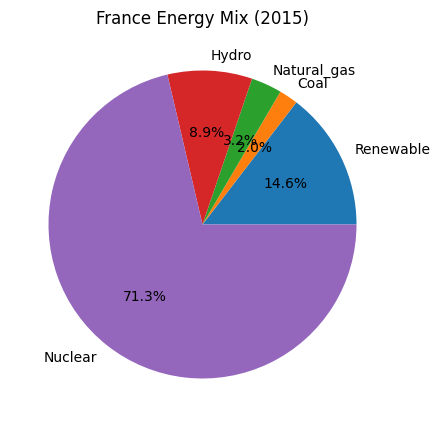

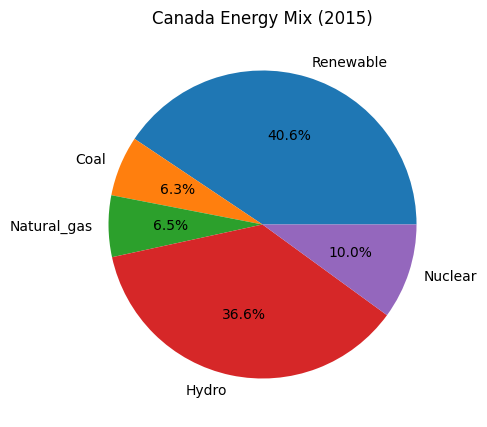

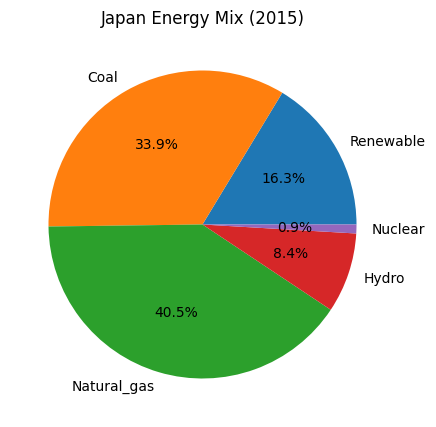

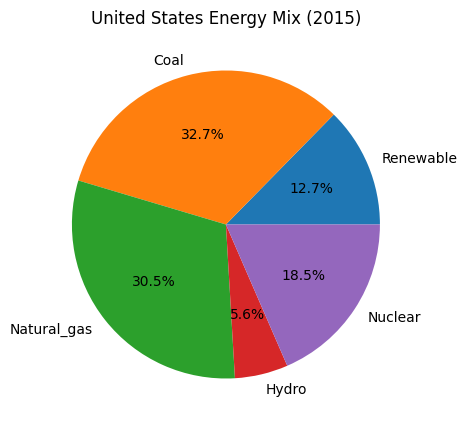

In [5]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# World Bank API URL template and energy indicators
url_template = 'http://api.worldbank.org/v2/country/{}/indicator/{}?format=json'
indicators = {
    'renewable': 'EG.ELC.RNEW.ZS',  # Renewable electricity output (% of total)
    'coal': 'EG.ELC.COAL.ZS',       # Coal electricity output (% of total)
    'natural_gas': 'EG.ELC.NGAS.ZS', # Natural gas electricity output (% of total)
    'hydro': 'EG.ELC.HYRO.ZS',       # Hydro electricity output (% of total)
    'nuclear': 'EG.ELC.NUCL.ZS'      # Nuclear electricity output (% of total)
}

# Countries of interest with full names
countries = {
    'CN': 'China',
    'IN': 'India',
    'BR': 'Brazil',
    'RU': 'Russia',
    'ZA': 'South Africa',
    'DE': 'Germany',
    'FR': 'France',
    'CA': 'Canada',
    'JP': 'Japan',
    'US': 'United States'
}

# Function to fetch data for each country and indicator
def fetch_energy_data(countries, indicators):
    data = []
    for code, name in countries.items():
        for energy_type, indicator in indicators.items():
            url = url_template.format(code, indicator)
            response = requests.get(url)
            if response.status_code == 200:
                json_data = response.json()
                if json_data[1]:  # Check if data is available
                    for entry in json_data[1]:
                        if entry['value'] is not None:  # Exclude missing values
                            data.append({
                                'Country': name,
                                'Year': int(entry['date']),
                                'Energy Type': energy_type.capitalize(),
                                'Value': entry['value']
                            })
    return pd.DataFrame(data)

# Fetch the data
energy_data = fetch_energy_data(countries, indicators)

# Plotting function for line trends
def plot_energy_trends(data, countries):
    for country in countries.values():
        country_data = data[data['Country'] == country]
        plt.figure(figsize=(8, 4))
        for energy_type in indicators.keys():
            energy_data = country_data[country_data['Energy Type'] == energy_type.capitalize()]
            plt.plot(energy_data['Year'], energy_data['Value'], label=energy_type.capitalize())

        plt.title(f'Energy Mix Trends in {country} Over Time')
        plt.xlabel('Year')
        plt.ylabel('Energy Share (%)')
        plt.legend(title='Energy Type', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.show()

# Pie chart function for latest energy mix
def plot_energy_pie(data, countries):
    latest_year = data['Year'].max()
    for country in countries.values():
        country_data = data[(data['Country'] == country) & (data['Year'] == latest_year)]
        if not country_data.empty:
            plt.figure(figsize=(5, 5))
            plt.pie(country_data['Value'], labels=country_data['Energy Type'], autopct='%1.1f%%')
            plt.title(f'{country} Energy Mix ({latest_year})')
            plt.show()

# Run the plots
plot_energy_trends(energy_data, countries)
plot_energy_pie(energy_data, countries)
